# Introduction

We wish to simulate a stochastic process where there are N users of our application that we contend will use our app within a 2 hour time period. To perform the simulation, we would like to have our users attempt to use the application at random times such that the distribution of the intervals between events accurately reflects what one might see in the real world.

In [1]:
N = 10000.0
T = 2.0
lmbda = N / T / 60 / 60
lmbda

1.3888888888888888

For the arrival rate, let's set $N = 10,000$ users, and our time interval $T = 2.0$ hours. From that, we can calculate an arrival rate of $\lambda = N / T = 5,000$ per hour or $\lambda = 1.388$ users / second.

Now for the times. Starting at $T_0$ we have no arrivals, but as time passes the probability of an event increases, until it reaches a near-certainty. If we randomly chose a value $U$ between 0 and 1, then we can calculate a random time interval as

$$
I_n = \frac{-ln U}{\lambda}
$$

Let's validate this by generating a large sample of intervals and taking their average.

In [20]:
count = int(1E6)
x = np.arange(count)
y = -np.log(1.0 - np.random.random_sample(len(x))) / lmbda
np.average(y)

0.71929111745536545

In [21]:
y[:10]

array([ 0.1315719 ,  0.0975074 ,  0.23880816,  0.15444505,  0.22988277,
        0.77673759,  0.79036711,  0.43808061,  1.29951833,  0.63123162])

So with a rate of $\lambda = 1.388$ new events would arrive on average $I = 0.72$ seconds apart (or $1 / \lambda$).

We can plot the distribution of these random times, where we should see an exponential distribution.

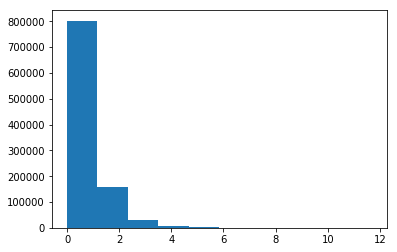

In [4]:
plt.hist(y, 10)
plt.show()

# Random Generation

Python contains the `random.expovariate` method which should give us similar intervals. Let's see by averaging a large sum of them.

In [5]:
from random import expovariate
sum([expovariate(lmbda) for i in range(count)])/count

0.7214415342877576

For completeness, we can also use NumPy's `random.poisson` method if we pass in $1 / \lambda$

In [19]:
y = np.random.exponential(1.0/lmbda, count)
np.cumsum(y)[:10]

array([  0.41607448,   1.1684804 ,   2.06405238,   2.79645109,
         4.59933146,   7.2532691 ,   7.32377567,   7.63112724,
         7.87685487,  10.05735753])

In [18]:
np.average(y)

0.71912660620119473

Again, this is in agreement with our expected average interval. Note the numbers (and histogram plots) won't match exactly as we are dealing with random time intervals.

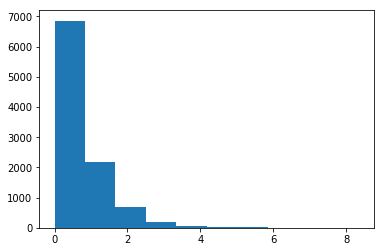

In [13]:
x = range(count)
y = [expovariate(lmbda) for i in x]
plt.hist(y, 10)
plt.show()

# Event Times

For a timeline of events, we can simply generate a sequence of independent intervals, and then generate a runnng sum of them for absolute timestamps.

In [8]:
intervals = [expovariate(lmbda) for i in range(1000)]
timestamps = [0.0]
timestamp = 0.0
for t in intervals:
    timestamp += t
    timestamps.append(timestamp)
timestamps[:10]

[0.0,
 1.3224654891101544,
 1.6176771941526784,
 7.4726505158688035,
 9.118169958496466,
 9.6621667226626,
 9.785745129323853,
 10.797284617682134,
 11.492111174613239,
 12.012244136855243]

In [9]:
deltas = [y - x for x, y in zip(timestamps, timestamps[1:])]
deltas[:10]

[1.3224654891101544,
 0.29521170504252403,
 5.854973321716125,
 1.6455194426276627,
 0.543996764166133,
 0.12357840666125419,
 1.011539488358281,
 0.6948265569311047,
 0.5201329622420037,
 0.47842851855116564]

In [10]:
sum(deltas) / len(deltas)

0.7480920248477916

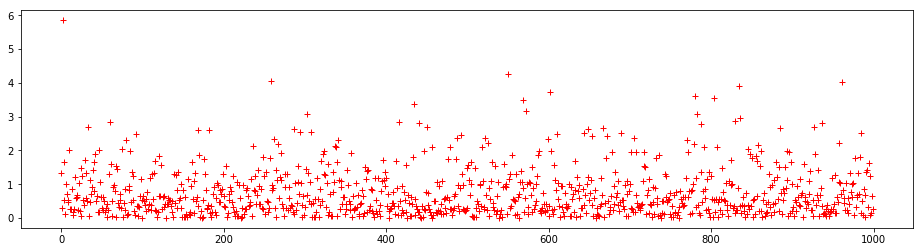

In [24]:
deltas = [y - x for x, y in zip(timestamps, timestamps[1:])]
plt.figure(figsize=(16, 4))
plt.plot(deltas, 'r+')
plt.show()

Here we can readily see how the time between events is distributed, with most of the deltas below 1.0 with some fairly large outliers. This is to be expected as $T_n$ will always be greater than $T_{n-1}$ but perhaps not by much.

Finally, let's generate $T = 2.0$ hours worth of timestamps and see if we have close to our desired $N$ value. We will do this 100 times and then average the counts. We should have a value that is very close to $N = 10,000$.

In [14]:
limit = T * 60 * 60
counts = []
for iter in range(100):
    count = 0
    timestamp = 0.0
    while timestamp < limit:
        timestamp += expovariate(lmbda)
        count += 1
    counts.append(count)
sum(counts) / len(counts)

10000.88